In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [5]:
df = pd.read_excel("raw_dataset_5.xlsx")

In [63]:
df.head()

,id,gender,month_1,gram1,month_2,gram2,month_3,gram3,last_6,gram_last_6,...,gram_last_12,all,gram_all,acc_age,redeem_interval,is_organic,is_product_1,is_product_2,is_product_3,is_product_4
0,683910,m,0,0,0,0,0,0,0,0,...,0,1,350,15,0,1,0,0,1,0
1,705096,f,0,0,0,0,0,0,0,0,...,0,1,350,14,0,1,0,1,0,0
2,688309,f,0,0,0,0,0,0,0,0,...,0,1,350,15,0,1,0,0,0,0
3,686438,f,0,0,0,0,0,0,0,0,...,0,1,350,15,0,1,1,0,0,0
4,686867,f,0,0,0,0,0,0,0,0,...,0,1,350,15,0,1,0,1,0,0


In [15]:
df.describe()

,id,month_1,gram1,month_2,gram2,month_3,gram3,last_6,gram_last_6,last_12,gram_last_12,all,gram_all,acc_age,redeem_interval,is_organic,is_product_1,is_product_2,is_product_3,is_product_4
count,6.556250e+05,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000,655625.000000
mean,5.977798e+05,0.203986,145.817075,0.191355,135.609731,0.237711,162.779287,1.510710,1040.567108,2.524856,1730.576122,8.938681,6109.401929,20.577928,15.846714,0.535012,0.410268,0.261598,0.120532,0.088621
std,2.546124e+05,1.032782,776.531550,0.962047,716.964595,1.696304,1208.849259,7.218839,5168.406622,9.562184,6870.088843,23.611033,17116.890448,15.956861,94.468152,0.498773,0.491883,0.439505,0.325583,0.284196
min,1.780000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,135.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.324530e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,350.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.138420e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1500.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.039040e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1100.000000,5.000000,3300.000000,23.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.030591e+06,37.000000,13350.000000,14.000000,10000.000000,290.000000,198510.000000,1257.000000,860960.000000,1257.000000,860960.000000,1257.000000,860960.000000,70.000000,2030.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.columns

Index(['id', 'gender', 'month_1', 'gram1', 'month_2', 'gram2', 'month_3',
       'gram3', 'last_6', 'gram_last_6', 'last_12', 'gram_last_12', 'all',
       'gram_all', 'acc_age', 'redeem_interval', 'is_organic', 'is_product_1',
       'is_product_2', 'is_product_3', 'is_product_4'],
      dtype='object')

# Univariate Analysis

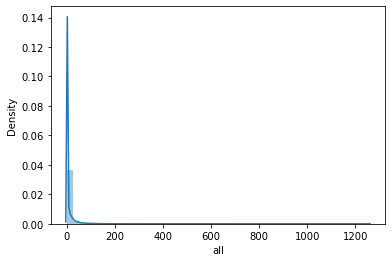

In [23]:
sns.distplot(df['all']);

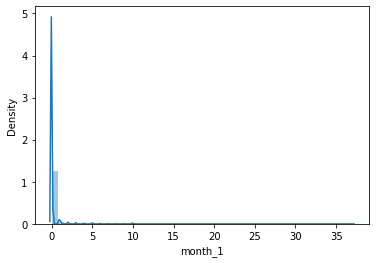

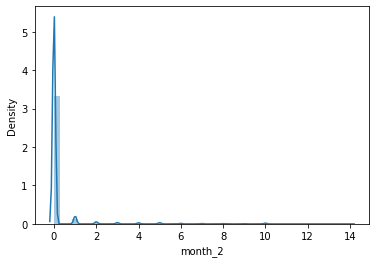

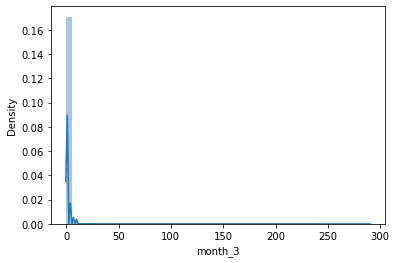

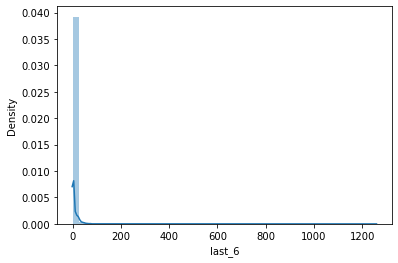

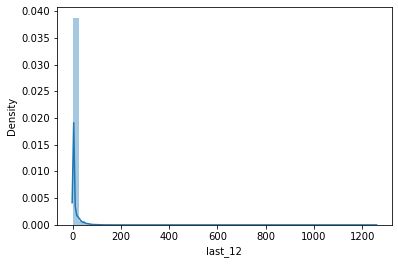

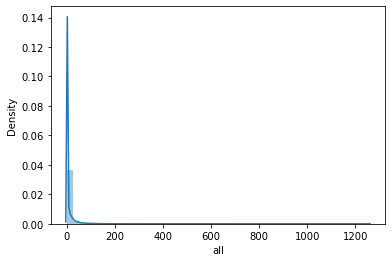

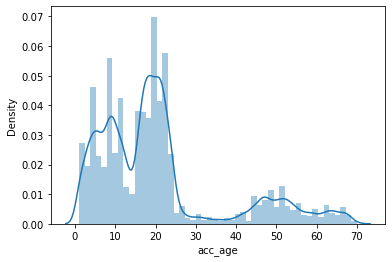

In [25]:
columns = ['month_1', 'month_2', 'month_3', 'last_6', 'last_12', 'all', 'acc_age']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

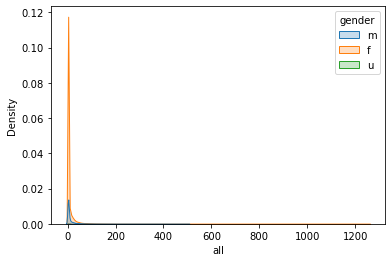

In [27]:
sns.kdeplot(df['all'],shade=True,hue=df['gender']);

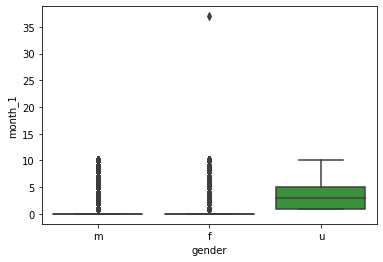

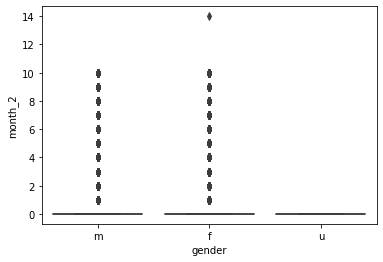

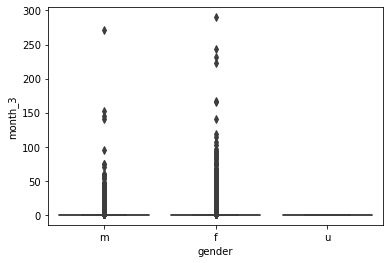

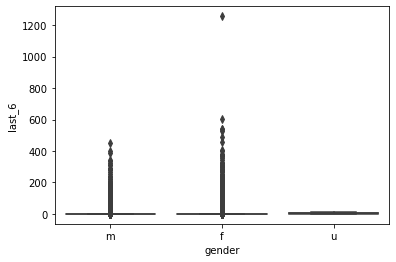

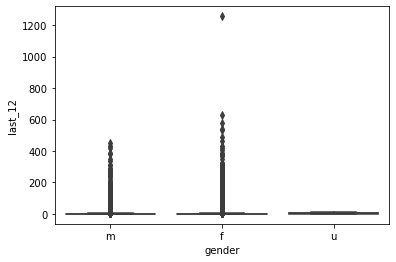

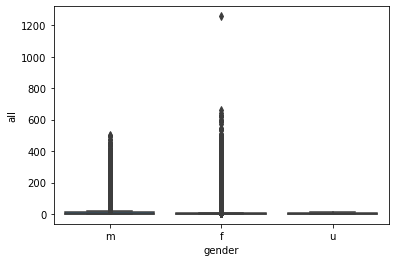

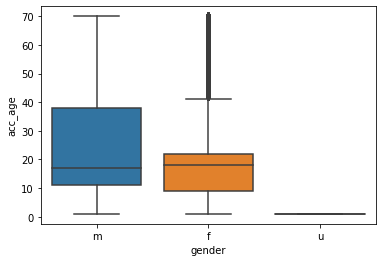

In [28]:
columns = ['month_1', 'month_2', 'month_3', 'last_6', 'last_12', 'all', 'acc_age']
for i in columns:
    plt.figure()
    sns.boxplot(data= df, x= 'gender',y= df[i])

In [65]:
df['gender'].value_counts(normalize=True)

f    0.847440
m    0.152026
u    0.000534
Name: gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='last_6', ylabel='last_12'>

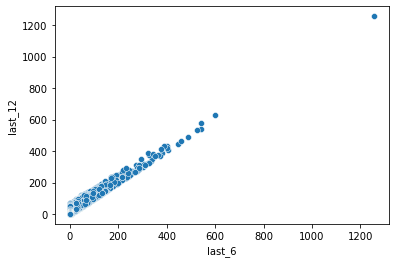

In [82]:
sns.scatterplot(data=df, x='last_6', y='last_12')

In [80]:
df.groupby(['gender'])['month_1', 'month_2', 'month_3', 'last_6', 'last_12', 'all', 'acc_age'].mean()

,month_1,month_2,month_3,last_6,last_12,all,acc_age
gender,,,,,,,
f,0.217598,0.206030,0.252347,1.559704,2.482368,8.289851,20.013828
m,0.116111,0.110222,0.156955,1.230195,2.757856,12.574143,23.791145
u,3.620000,0.000000,0.000000,3.620000,3.620000,3.620000,1.000000


In [94]:
df_corr = df.corr()
df_corr

,id,month_1,gram1,month_2,gram2,month_3,gram3,last_6,gram_last_6,last_12,...,all,gram_all,acc_age,redeem_interval,is_organic,is_product_1,is_product_2,is_product_3,is_product_4,New Cluster
id,1.000000,0.198914,0.180712,0.182290,0.164792,0.121561,0.110859,0.165511,0.152063,0.153051,...,-0.319553,-0.311617,-0.951428,-0.252272,-0.156136,0.104532,-0.173872,0.188033,-0.018772,-0.031717
month_1,0.198914,1.000000,0.975169,0.572637,0.563941,0.345175,0.348456,0.557387,0.561401,0.528726,...,0.234144,0.236453,-0.153456,0.071964,0.120928,-0.000034,-0.043729,0.058148,0.014509,0.217050
gram1,0.180712,0.975169,1.000000,0.569169,0.581240,0.346415,0.360746,0.559153,0.581099,0.534705,...,0.241966,0.250944,-0.140049,0.077292,0.114162,-0.007414,-0.045129,0.058136,0.021648,0.206987
month_2,0.182290,0.572637,0.569169,1.000000,0.974726,0.394897,0.397191,0.586283,0.589640,0.571295,...,0.261020,0.263601,-0.142168,0.081046,0.096606,-0.000106,-0.047210,0.057443,0.014945,0.219511
gram2,0.164792,0.563941,0.581240,0.974726,1.000000,0.392462,0.409089,0.584791,0.607556,0.575239,...,0.268079,0.277854,-0.129349,0.086083,0.097829,-0.006344,-0.047868,0.056076,0.021157,0.209580
month_3,0.121561,0.345175,0.346415,0.394897,0.392462,1.000000,0.984200,0.620852,0.611736,0.566498,...,0.251641,0.248853,-0.096114,0.068428,0.069816,0.002230,-0.031125,0.036010,0.009541,0.141872
gram3,0.110859,0.348456,0.360746,0.397191,0.409089,0.984200,1.000000,0.621658,0.629455,0.571529,...,0.257396,0.261107,-0.088344,0.072263,0.071720,-0.003532,-0.031461,0.036822,0.014236,0.141711
last_6,0.165511,0.557387,0.559153,0.586283,0.584791,0.620852,0.621658,1.000000,0.986917,0.917925,...,0.412050,0.406751,-0.133420,0.120679,0.113480,-0.001658,-0.045546,0.048600,0.021441,0.217987
gram_last_6,0.152063,0.561401,0.581099,0.589640,0.607556,0.611736,0.629455,0.986917,1.000000,0.912008,...,0.415047,0.420180,-0.123198,0.125722,0.114802,-0.008826,-0.046203,0.049300,0.027634,0.215553
last_12,0.153051,0.528726,0.534705,0.571295,0.575239,0.566498,0.571529,0.917925,0.912008,1.000000,...,0.506884,0.503024,-0.129702,0.195593,0.144064,-0.011523,-0.054627,0.050723,0.036948,0.255758


In [95]:
df_corr.to_excel('data_corr.xlsx')

In [11]:
df_var = df.drop(columns=["id", "gram1", "gram2", "gram3", "gram_last_6", "gram_last_12", "gram_all"])

<AxesSubplot:>

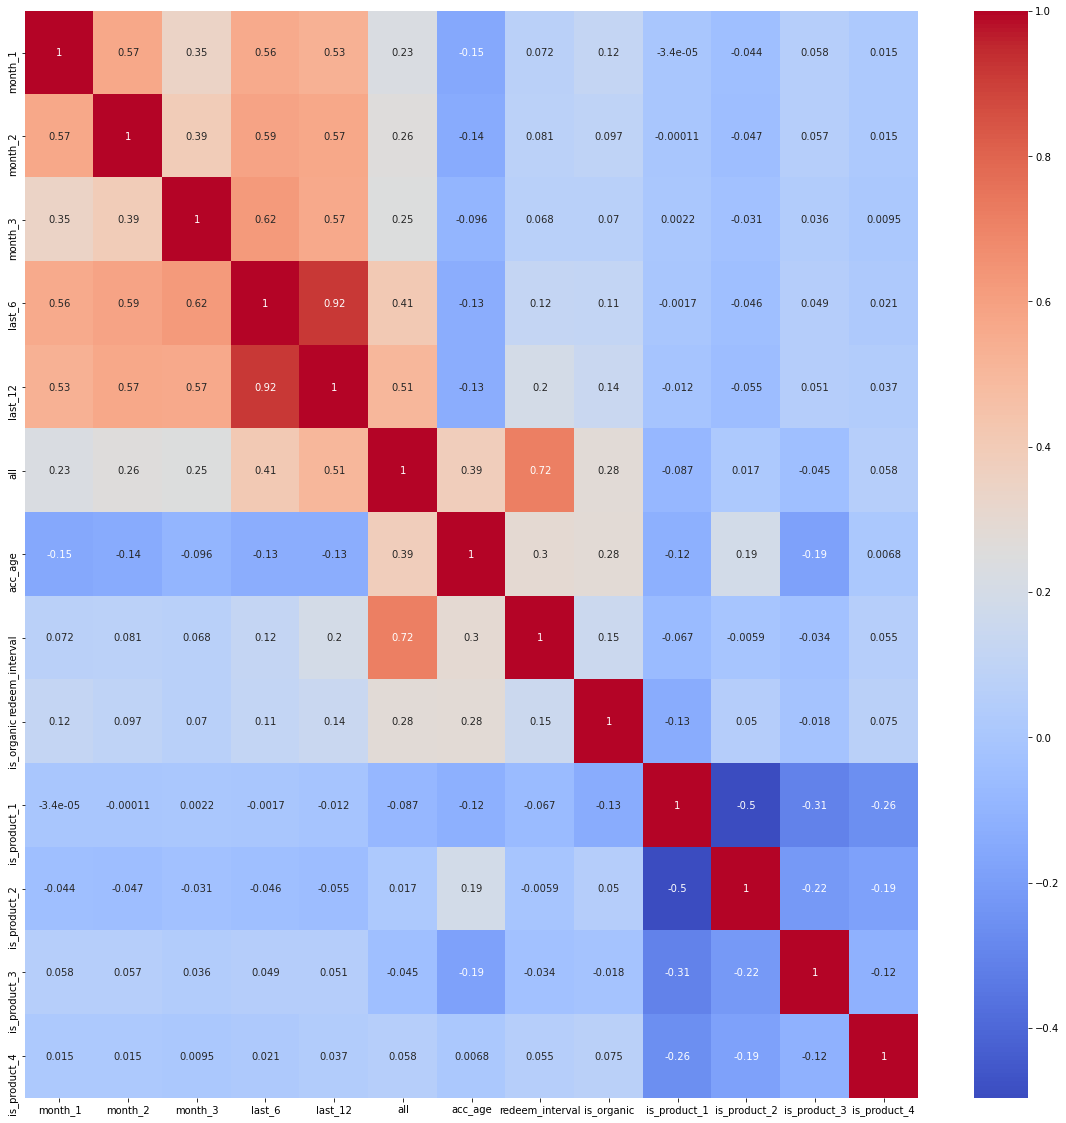

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df_var.corr(),annot=True, cmap='coolwarm')

In [96]:
norm_df2.head()

,month_1,month_2,month_3,last_6,last_12,all,acc_age
0,0.0,0.0,0.0,0.0,0.0,0.066519,0.997785
1,0.0,0.0,0.0,0.0,0.0,0.071247,0.997459
2,0.0,0.0,0.0,0.0,0.0,0.066519,0.997785
3,0.0,0.0,0.0,0.0,0.0,0.066519,0.997785
4,0.0,0.0,0.0,0.0,0.0,0.066519,0.997785


# Multivariate Cluster - KMeans

In [90]:
clustering = KMeans(n_clusters=3)
clustering.fit(norm_df2)

KMeans(n_clusters=3)

In [91]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
df['New Cluster'] = clustering.labels_
df.head()

,id,gender,month_1,gram1,month_2,gram2,month_3,gram3,last_6,gram_last_6,...,all,gram_all,acc_age,redeem_interval,is_organic,is_product_1,is_product_2,is_product_3,is_product_4,New Cluster
0,683910,m,0,0,0,0,0,0,0,0,...,1,350,15,0,1,0,0,1,0,0
1,705096,f,0,0,0,0,0,0,0,0,...,1,350,14,0,1,0,1,0,0,0
2,688309,f,0,0,0,0,0,0,0,0,...,1,350,15,0,1,0,0,0,0,0
3,686438,f,0,0,0,0,0,0,0,0,...,1,350,15,0,1,1,0,0,0,0
4,686867,f,0,0,0,0,0,0,0,0,...,1,350,15,0,1,0,1,0,0,0


In [93]:
df.to_excel('raw_data_6.xlsx')

In [59]:
kmeans.inertia_

22532.61552325621

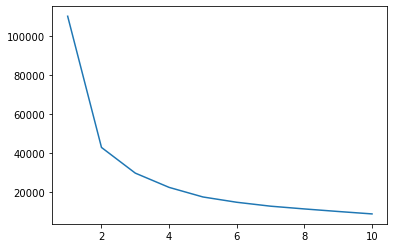

In [60]:
intertia_score1=[]
for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(norm_df2)
    intertia_score1.append(kmeans1.inertia_)
plt.plot(range(1,11), intertia_score1)

In [61]:
df

,id,gender,month_1,gram1,month_2,gram2,month_3,gram3,last_6,gram_last_6,...,is_product_1,is_product_2,is_product_3,is_product_4,n_month_1,n_month_2,n_month_3,n_last_6,n_last_12,n_all
0,683910,m,0,0,0,0,0,0,0,0,...,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.066519
1,705096,f,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.071247
2,688309,f,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.066519
3,686438,f,0,0,0,0,0,0,0,0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.066519
4,686867,f,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.066519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655620,376492,f,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.114624
655621,376726,f,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.114624
655622,377653,f,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.114624
655623,378118,f,0,0,0,0,0,0,0,0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.114624
